In [20]:
import pandas as pd
import numpy as np
import sklearn as sk
import time
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from time import strptime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#%run './base.ipynb'

# Import Data
Data contains no missing values. Features 'month', 'day' are dtype object.

In [49]:
## import data 
data = pd.read_csv('/Users/annanau/Documents/Workspace/ML_Ex2/data/forest_fires/forestfires.csv')
#display(data.isna().sum()) 
#data.info()
print(data.head(10))

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0


# Preprocessing
- data contains no missing values
- 'month', 'day' are dtype object, need to be made numeric

In [50]:
# convert 'month', 'day' to numeric variables 
data2 = data
data2['month'] = pd.to_datetime(data['month'], format = '%b').dt.month
data2['day'] = data['day'].apply(lambda x: time.strptime(x, '%a')).apply(lambda x: x.tm_wday)

#data2.info()
#data2.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19a13550>,
      dtype=object)

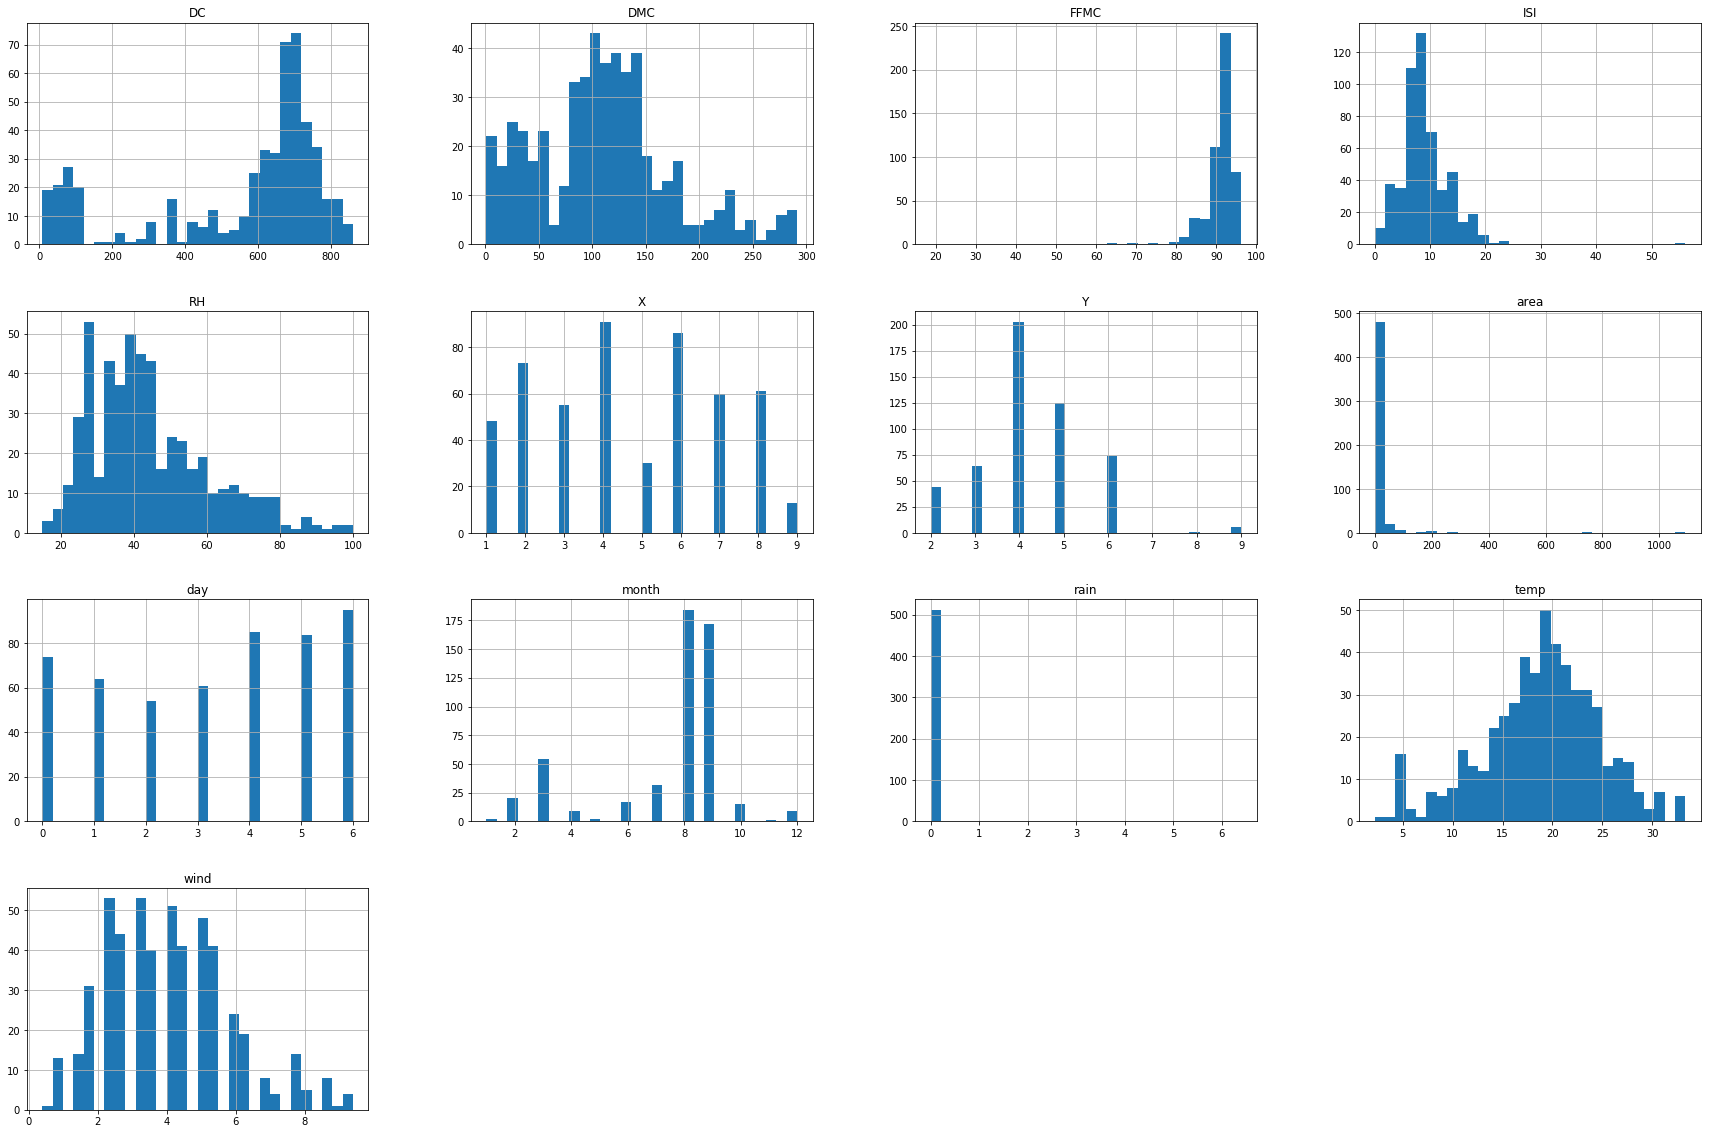

In [4]:
## Checking for outliers 
# Descriptive statistics table
display(data.describe())

# Histograms
data.hist(bins = 30, figsize=(30,20))

# Visualizations

/Users/annanau/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


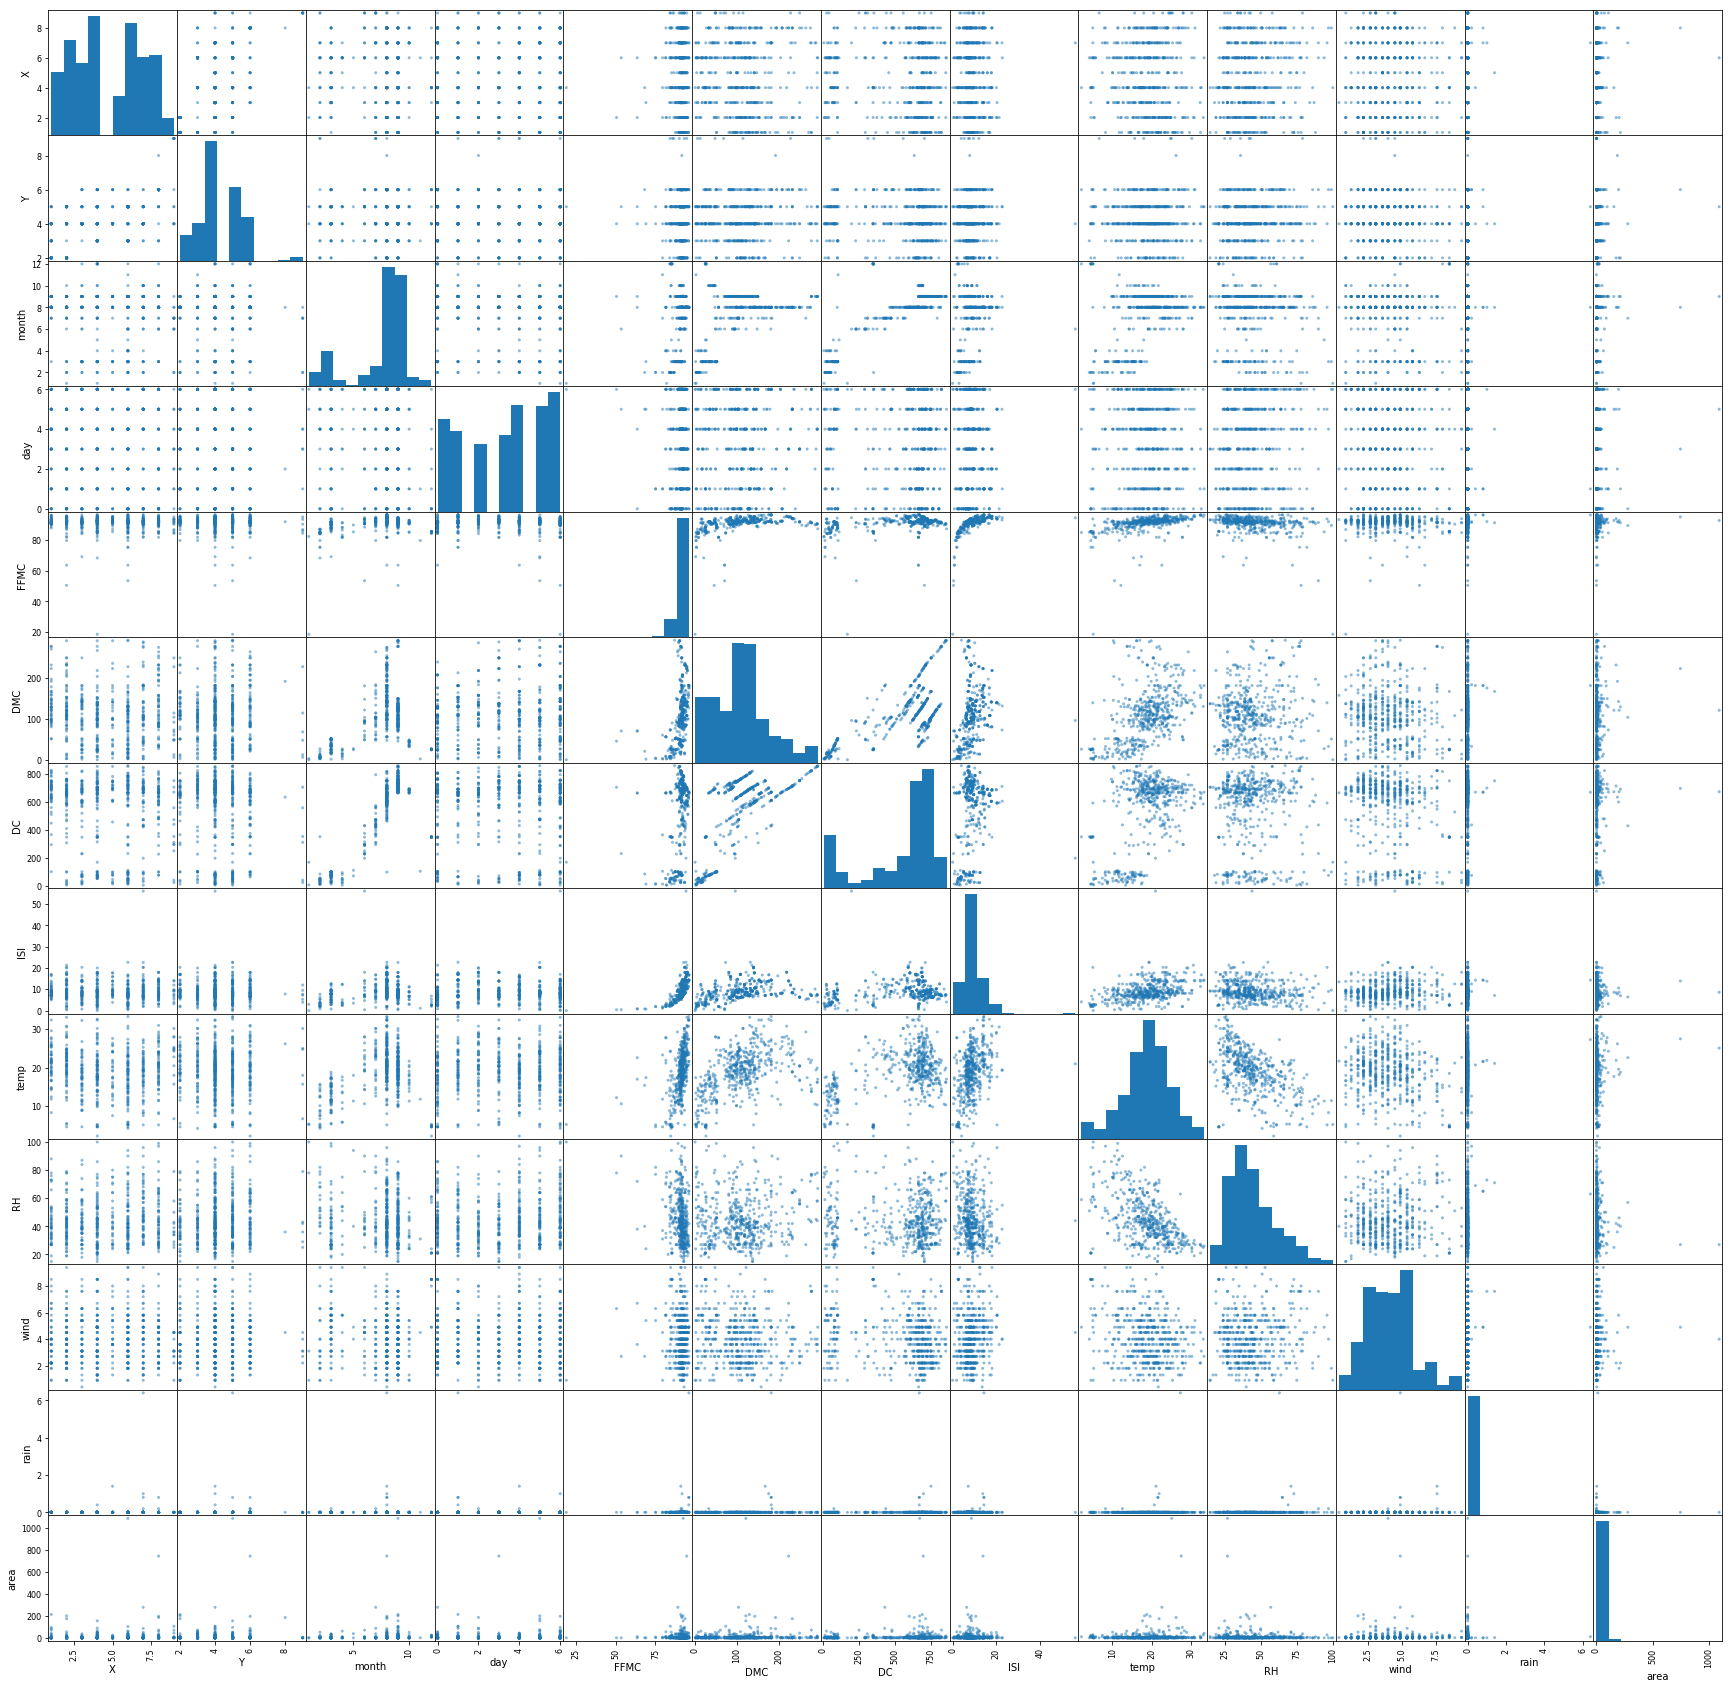

In [8]:
# Scatter Plot Matrix
fig = plt.figure(figsize=(30,30))
ax = fig.subplots()
sm = pd.plotting.scatter_matrix(data2, ax = ax)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


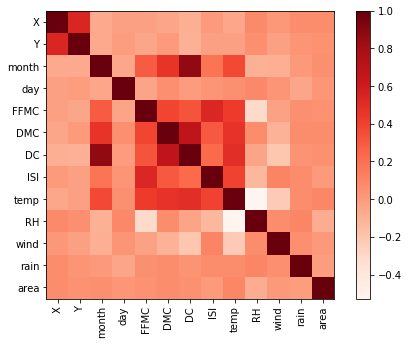

In [13]:
# Correlation 
display(data2.corr())

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.imshow(data2.corr(), cmap = plt.cm.Reds, interpolation = 'nearest')
plt.colorbar()
ticks = [i for i in range(len(data2.columns))]
plt.xticks(ticks, data2.columns, rotation = 'vertical')
plt.yticks(ticks, data2.columns)
plt.show()

# Prediction Model

In [51]:
# Split into train (size = 2/3) and test data using sklearn's train/test splitter function
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 0:12], data2.iloc[:, 12], test_size = 0.33, random_state= 123)

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [55]:
## Models

# Linear Regression
def linear_reg(X_train, y_train, X_test, y_test, get_coef = True):
    # Build model
    reg = LinearRegression().fit(X_train, y_train)
    r2_score = reg.score(X_train, y_train)
    
    coef = {}
    if get_coef:
        coef = {
            'Coefficients: ' :reg.coef_
        }
    
    # Predict test data and compute MSE
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    metrics = {'R2 Score: ': [r2_score], 'MSE: ' : mse}
    
    return reg, coef, metrics

def run_boosted_tree(train_data, train_target, test_data, test_target, param_fix, cv, param_grid):
    print("GridSearch initializing...")
    clf = GridSearchCV(estimator = GradientBoostingRegressor(**param_fix), cv = cv, param_grid = param_grid, 
                       scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], 
                       refit = 'neg_mean_squared_error')
    
    print("GradientBoostedRegressor model in training...")
    t0 = time.time()
    clf.fit(train_data, train_target)
    clf_fit = time.time() - t0
    print("GradientBoostedRegressor model selected and fitted in %.3f s\n" % clf_fit)
    
    best_params = clf.best_params_
    print("Best parameters selected by GridSearch: %s" % best_params)
    
    return clf

In [68]:
# Fit model using unscaled train data and predict test data
display('### Linear Regression ###')
reg, coef, metrics = linear_reg(X_train, y_train, X_test, y_test)
display(coef)
display(metrics)

display('### Gradient Boosted Decision Tree ###')
param_fix = {'learning_rate': 0.1, 'loss': 'ls'}
cv = 10
param_grid = {'n_estimators': (50, 100, 150, 200, 300, 400, 500), 'max_depth': (1, 2, 3, 4, 5), 'min_samples_split': (2,3,5)}
gbt = run_boosted_tree(X_train, y_train, X_test, y_test, param_fix, cv, param_grid)
pred_gbt = clf.predict(X_test)
print(mean_squared_error(y_test, pred_gbt))

'### Linear Regression ###'

{'Coefficients: ': array([ 3.68651441,  3.08284942,  1.99650678,  0.5483867 , -0.08050716,
         0.08244698, -0.02465899, -1.00433877,  1.8194057 , -0.26458417,
         2.62396582, -5.85218142])}

{'R2 Score: ': [0.04712634033378349], 'MSE: ': 1228.996108415996}

'### Gradient Boosted Decision Tree ###'

GridSearch initializing...
GradientBoostedRegressor model in training...
GradientBoostedRegressor model selected and fitted in 68.462 s

Best parameters selected by GridSearch: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 50}
1025.8795125159331


In [54]:
# Fit model using scaled train data and predict test data
display('### Linear Regression w/ Scaled Data ###')
scaler = preprocessing.StandardScaler().fit(X_train) # standardize data
reg, coef, metrics = linear_reg(scaler.transform(X_train),y_train, scaler.transform(X_test),y_test)
display(coef)
display(metrics)
reg.score(scaler.transform(X_test),y_test)

{'Coefficients: ': array([ 8.37792853,  3.62004722,  4.55432193,  1.1127311 , -0.36047671,
         5.23264206, -6.16986409, -4.63037897, 10.47529606, -4.28474325,
         4.67646042, -2.11168202])}

{'R2 Score: ': [0.04712634033378316], 'MSE: ': 1228.9961084159954}

-0.6491764256348298